In [ ]:
# passo a passo

# -> Analise dos dados
# 1. carregamento dos dados
# 2. visualização dos dados

# -> Machine Learning
# 3. preprocessamento dos dados
# 4. treinamento do modelo
# 5. predição do modelo
# 6. avaliação do modelo

In [1]:
# importação das bibliotecas

import pandas as pd                  # Analise e tratamento de dados
import numpy as np                   # Tratamento de dados numéricos
import matplotlib                    # Visualização de dados, importação para verficação da versão do matplotlib
import seaborn as sns                # Visualização de dados
import matplotlib.pyplot as plt      # Visualização de dados
from pylab import mpl, plt           # Visualização de dados, configuração de parametros de visualização

plt.style.use('ggplot')

In [2]:
# versões das bibliotecas
# importante analisar a versão das bibliotecas, pois algumas funcionalidades são das versões mais recentes

print(f'Versão Pandas :', pd.__version__)
print(f'Versão Numpy :', np.__version__)
print(f'Versão Matplotlib :', matplotlib.__version__)
print(f'Versão Seaborn :', sns.__version__)

Versão Pandas : 1.2.4
Versão Numpy : 1.19.5
Versão Matplotlib : 3.5.1
Versão Seaborn : 0.11.1


In [3]:
# leitura de dados direto do github e importação para uma variavel

transfusion_df = pd.read_csv('https://raw.githubusercontent.com/caiquemiranda/EDA-Exploratory-Data-Analysis/main/data/transfusion.csv')

In [4]:
# visualização dos primeiros registros

transfusion_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [5]:
# visualização dos primeiros registros

transfusion_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:
# visualização de infomações dos dados(tipo, quantidade, etc)

transfusion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [7]:
# visualização de infomações estatísticas dos dados

transfusion_df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [8]:
# DataFrame com a quantidade de valores nulos dos dados

valores_nulos = pd.DataFrame(transfusion_df.isnull().sum())
valores_nulos.columns =  ['Qt_NaN']
valores_nulos

,Qt_NaN
Recency (months),0
Frequency (times),0
Monetary (c.c. blood),0
Time (months),0
whether he/she donated blood in March 2007,0


In [9]:
# analise de correlação das variaveis com o alvo(target)

target = 'whether he/she donated blood in March 2007'
transfusion_df.corr()[target]

Recency (months)                             -0.279869
Frequency (times)                             0.218633
Monetary (c.c. blood)                         0.218633
Time (months)                                -0.035854
whether he/she donated blood in March 2007    1.000000
Name: whether he/she donated blood in March 2007, dtype: float64

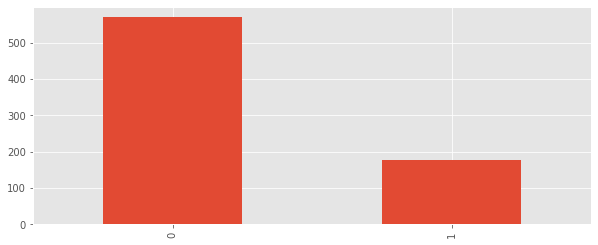

In [10]:
# visualização de quantidade dos valores da variavel alvo(target)

transfusion_df[target].value_counts().plot(kind='bar', figsize=(10,4));

In [11]:
# nome das variaveis(colunas)

transfusion_df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [12]:
# quantidade de cada valor da variavel 'Recency months'

transfusion_df['Recency (months)'].value_counts()

2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
8       6
12      6
5       6
6       5
13      5
0       5
10      3
38      2
15      2
18      2
20      1
22      1
25      1
26      1
35      1
17      1
39      1
40      1
72      1
74      1
Name: Recency (months), dtype: int64

In [13]:
# quantidade de cada valor da variavel 'Frequency (times)'

transfusion_df['Frequency (times)'].value_counts()

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
10     14
12     14
14     13
16     13
13      9
15      6
17      4
24      3
19      2
20      2
21      2
22      2
18      1
23      1
26      1
33      1
34      1
38      1
41      1
43      1
44      1
46      1
50      1
Name: Frequency (times), dtype: int64

In [14]:
# quantidade de cada valor da variavel 'Monetary (c.c. blood)'

transfusion_df['Monetary (c.c. blood)'].value_counts()

250      158
500      112
750       87
1000      62
1250      62
1500      52
1750      43
2000      31
2250      24
2750      22
3000      14
2500      14
3500      13
4000      13
3250       9
3750       6
4250       4
6000       3
5250       2
5000       2
4750       2
5500       2
12500      1
11000      1
6500       1
11500      1
5750       1
10750      1
9500       1
8500       1
8250       1
4500       1
10250      1
Name: Monetary (c.c. blood), dtype: int64

In [15]:
# quantidade de cada valor da variavel 'Time (months)'

transfusion_df['Time (months)'].value_counts()

4     57
16    51
14    44
2     36
23    36
      ..
13     1
65     1
3      1
12     1
17     1
Name: Time (months), Length: 78, dtype: int64

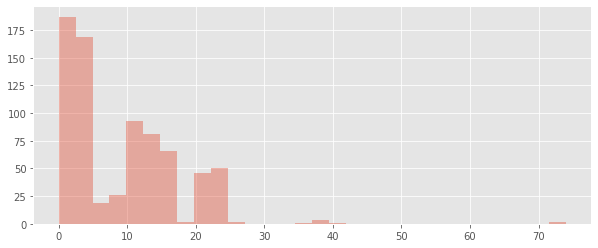

In [16]:
# configuração do gráfico
plt.figure(figsize = [10, 4])

# plotagem do gráfico de distribuição da variavel 'Recency (months)'
plt.hist(transfusion_df['Recency (months)'], bins=30, alpha=.4);

In [17]:
# descrição estatistica da variavel 'Recency (months)'

transfusion_df['Recency (months)'].describe()

count    748.000000
mean       9.506684
std        8.095396
min        0.000000
25%        2.750000
50%        7.000000
75%       14.000000
max       74.000000
Name: Recency (months), dtype: float64

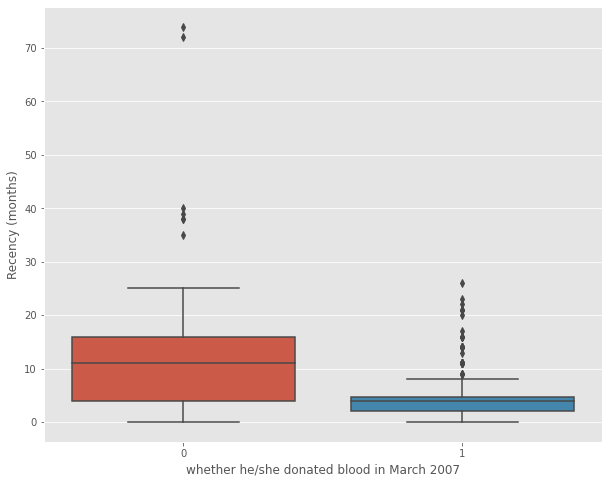

In [18]:
# configuração do tamanho do gráfico
plt.figure(figsize = [10, 8])

# plotagem do gráfico de boxplot da variavel 'Recency (months)'
sns.boxplot(data=transfusion_df, x=target, y='Recency (months)');

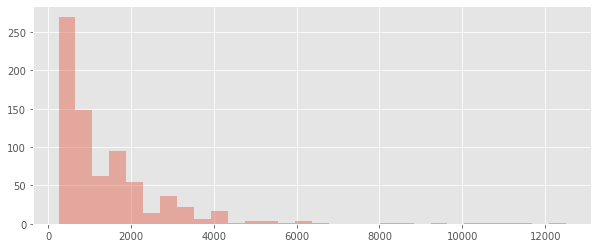

In [19]:
# configuração do tamanho do gráfico
plt.figure(figsize = [10, 4])

# plotagem do gráfico de distribuição da variavel 'Monetary (c.c. blood)'
plt.hist(transfusion_df['Monetary (c.c. blood)'], bins=30, alpha=.4);

In [20]:
# descrição estatistica da variavel 'Monetary (c.c. blood)'

transfusion_df['Monetary (c.c. blood)'].describe()

count      748.000000
mean      1378.676471
std       1459.826781
min        250.000000
25%        500.000000
50%       1000.000000
75%       1750.000000
max      12500.000000
Name: Monetary (c.c. blood), dtype: float64

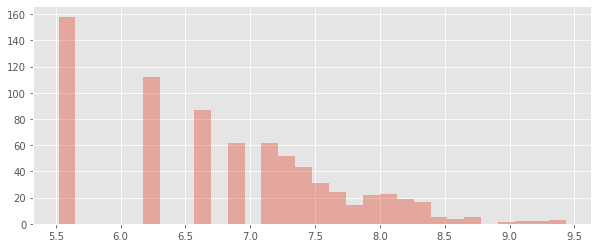

In [21]:
# configuração do tamanho do gráfico
plt.figure(figsize = [10, 4])

# plotagem do gráfico de distribuição da variavel 'Monetary (c.c. blood)' convertendo para valores em log
plt.hist(np.log(transfusion_df['Monetary (c.c. blood)']), bins=30, alpha=.4);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


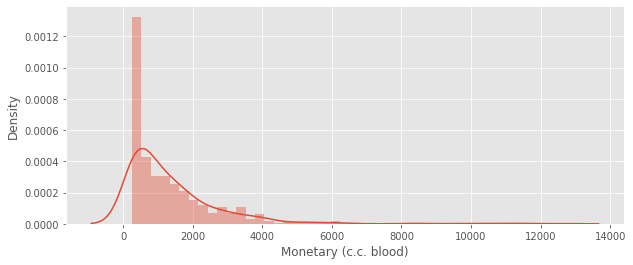

In [22]:
# configuração do tamanho do gráfico
plt.figure(figsize=[10, 4])

# plotagem do gráfico de distribuição da variavel 'Monetary (c.c. blood)' 
sns.distplot(transfusion_df['Monetary (c.c. blood)']);

In [23]:
# Normalizando a variável usando log 
transfusion_df['Monetary (c.c. blood)'] = np.log(transfusion_df['Monetary (c.c. blood)'])

# visualização dos primeiros registros
transfusion_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,9.433484,98,1
1,0,13,8.086410,28,1
2,1,16,8.294050,35,1
3,2,20,8.517193,45,1
4,1,24,8.699515,77,0


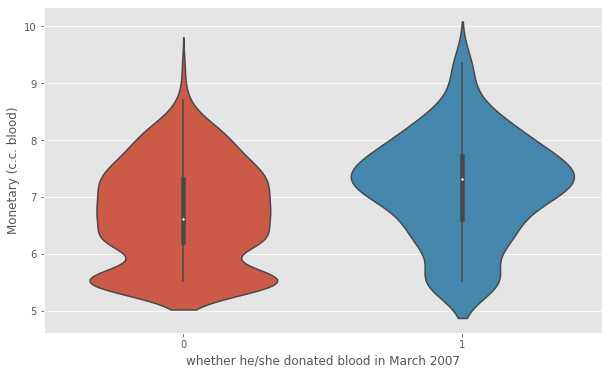

In [35]:
# plotagem estilo violino
# configuração do tamanho do gráfico
plt.figure(figsize=[10,6])

# plotagem do gráfico de boxplot da variavel 'Monetary (c.c. blood)' com estilo violino
sns.violinplot(data=transfusion_df, x=target, y='Monetary (c.c. blood)');

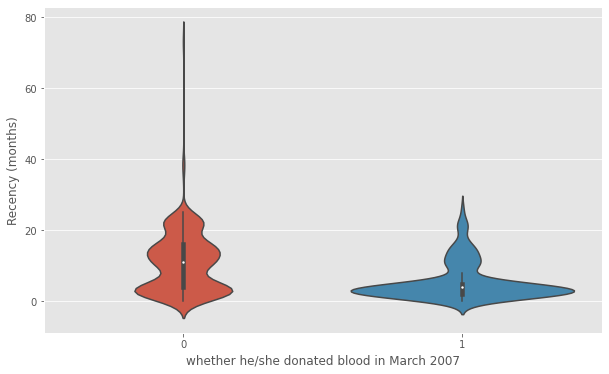

In [34]:
# configuração do tamanho do gráfico
plt.figure(figsize=[10,6])

# plotagem do gráfico de boxplot da variavel 'Recency (months)' com estilo violino
sns.violinplot(data=transfusion_df, x=target, y='Recency (months)');

In [28]:
# retirada dos outliers
transfusion_df_ = transfusion_df[transfusion_df['Recency (months)'] < 50]

# visualização do tamanho antes e depois da retirada dos outliers
print('New Shape Before Removing Outlier ', transfusion_df.shape)
print('New Shape After Removing Outlier ', transfusion_df_.shape)

New Shape Before Removing Outlier  (748, 5)
New Shape After Removing Outlier  (746, 5)


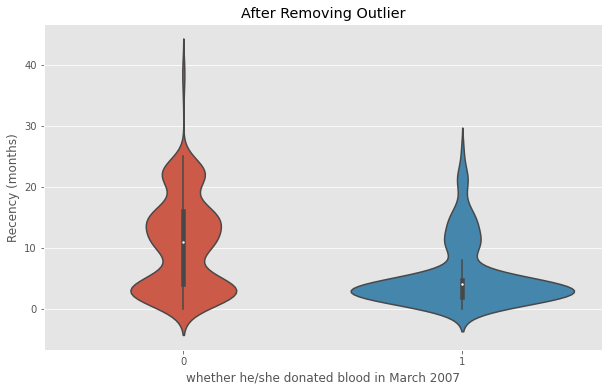

In [33]:
# configuração do tamanho do gráfico
plt.figure(figsize=[10,6])

# configuração do titulo do gráfico
plt.title('After Removing Outlier')

# plotagem do gráfico de boxplot da variavel 'Recency (months)' com estilo violino
sns.violinplot(data=transfusion_df_, x=target, y='Recency (months)');

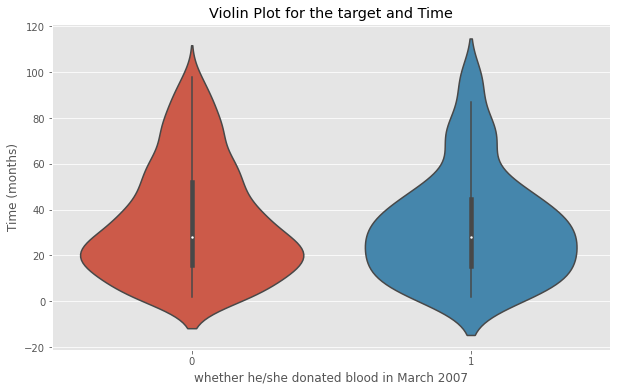

In [37]:
plt.figure(figsize=[10,6])
plt.title('Violin Plot for the target and Time')
sns.violinplot(data=transfusion_df_, x=target, y='Time (months)');

In [38]:
# visualização dos ultimos registros
transfusion_df_.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
742,16,3,6.620073,86,0
743,23,2,6.214608,38,0
744,21,2,6.214608,52,0
745,23,3,6.620073,62,0
746,39,1,5.521461,39,0


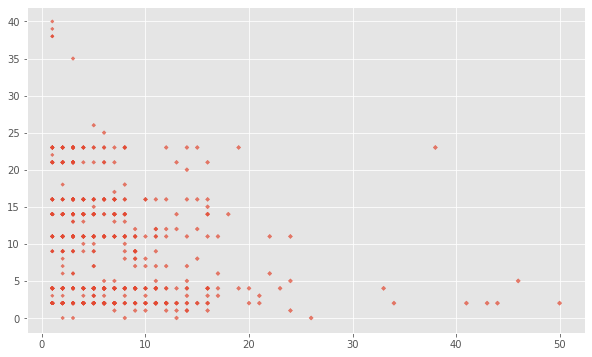

In [39]:
# before that let see correlation between columns
plt.figure(figsize=[10, 6])
plt.scatter(transfusion_df_['Frequency (times)'], transfusion_df_['Recency (months)'], s=transfusion_df_['Monetary (c.c. blood)'], marker='D', alpha=.7);

<Figure size 1008x720 with 0 Axes>

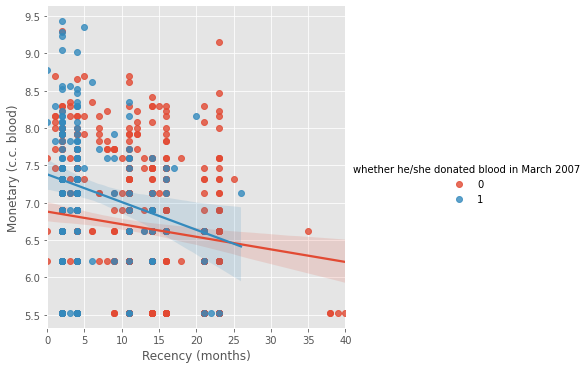

In [52]:
# configuração do tamanho do gráfico
plt.figure(figsize=[14, 10])

# plotagem do gráfico de dispersão da variavel 'Recency (months)' com regressão linear
sns.lmplot(data=transfusion_df_, x='Recency (months)', y='Monetary (c.c. blood)', scatter=True, fit_reg=True, hue=target);

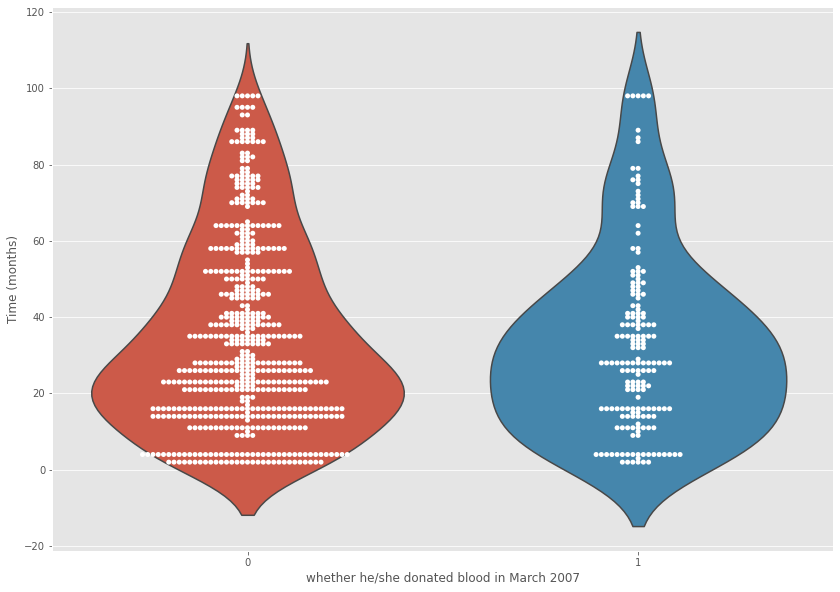

In [53]:
# configuração de tamanho do gráfico
plt.figure(figsize=[14, 10])

# plotagem do gráfico estilo volino
sns.swarmplot(data=transfusion_df_, x=target, y='Time (months)', color='w')
sns.violinplot(data=transfusion_df_, x=target, y='Time (months)', inner=None);

In [42]:
# separação das variaveis preditoras(X) e o target alvo (y)
X = transfusion_df_.drop(target, axis=1)
y = transfusion_df_[target]

# visualização do tamanho dos dados
X.shape

(746, 4)

In [43]:
# importação do modulo de separação de treino e teste 
from sklearn.model_selection import train_test_split

# separação dos dados em treino e teste e visualização do tamanho
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123) # separação de 80% treino e 20% teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(596, 4)
(150, 4)
(596,)
(150,)


In [44]:
# importação do modelo de regressão logistica
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')

# treinamento do modelo de regressão logistica
lr.fit(X_train, y_train)

LogisticRegression()

In [45]:
# importação de bibliotecas para avaliação do modelo
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Accuracy do modelo com os dados de treino
print('Accuracy Score On Train Data: {}'.format(lr.score(X_train, y_train)))

# Accuracy do modelo com os dados de teste
print('Accuracy Score On Test Data: {}'.format(lr.score(X_test, y_test)))

Accuracy Score On Train Data: 0.7936241610738255
Accuracy Score On Test Data: 0.7933333333333333


In [46]:
# predição com o modelo regressão logistica
y_pred = lr.predict(X_test)

# F1 score qualidade do predição do modelo
print("F1 Score {}".format(f1_score(y_pred, y_test)))

# Classificação de resultados
print("Classification Report \n{}".format(classification_report(y_pred, y_test)))

# matriz de confusão
print("Confusion Matrix \n{}".format(confusion_matrix(y_pred, y_test)))

F1 Score 0.2790697674418604
Classification Report 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       136
           1       0.21      0.43      0.28        14

    accuracy                           0.79       150
   macro avg       0.57      0.63      0.58       150
weighted avg       0.87      0.79      0.82       150

Confusion Matrix 
[[113  23]
 [  8   6]]


In [47]:
# importando bibliotecas de avaliação do modelo cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=5)
print(scores)

[0.75       0.81512605 0.81512605 0.79831933 0.78991597]


In [48]:
# importação dos modelos random forest e gradient boosting
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf = RandomForestClassifier()
grb = GradientBoostingClassifier()

RandomForestClassifier()

In [49]:
# treinamento do modelo random forest
rf.fit(X_train, y_train)

# avaliação do modelo random forest
print('Accuracy Score On Train Data: {}'.format(rf.score(X_train, y_train)))
print('Accuracy Score On Test Data: {}'.format(rf.score(X_test, y_test)))

Accuracy Score On Train Data: 0.9395973154362416
Accuracy Score On Test Data: 0.7133333333333334


In [50]:
# avaliação do modelo random forest

scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=5)
print(scores)

[0.7        0.80672269 0.73109244 0.7394958  0.7394958 ]


In [51]:
# treinamento do modelo gradient boosting
grb.fit(X_train, y_train)

# Avaliação do modelo gradient boosting
print('Accuracy Score On Train Data: {}'.format(grb.score(X_train, y_train)))
print('Accuracy Score On Test Data: {}'.format(grb.score(X_test, y_test)))

Accuracy Score On Train Data: 0.8389261744966443
Accuracy Score On Test Data: 0.82
[0.7        0.80672269 0.7394958  0.78151261 0.76470588]


In [ ]:
# avaliação do modelo gradient boosting

scores = cross_val_score(grb, X_train, y_train, scoring='accuracy', cv=5)
print(scores)